In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing

In [7]:
df = pd.read_csv('diabetes (1).csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.corr().style.background_gradient(cmap='BuGn')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


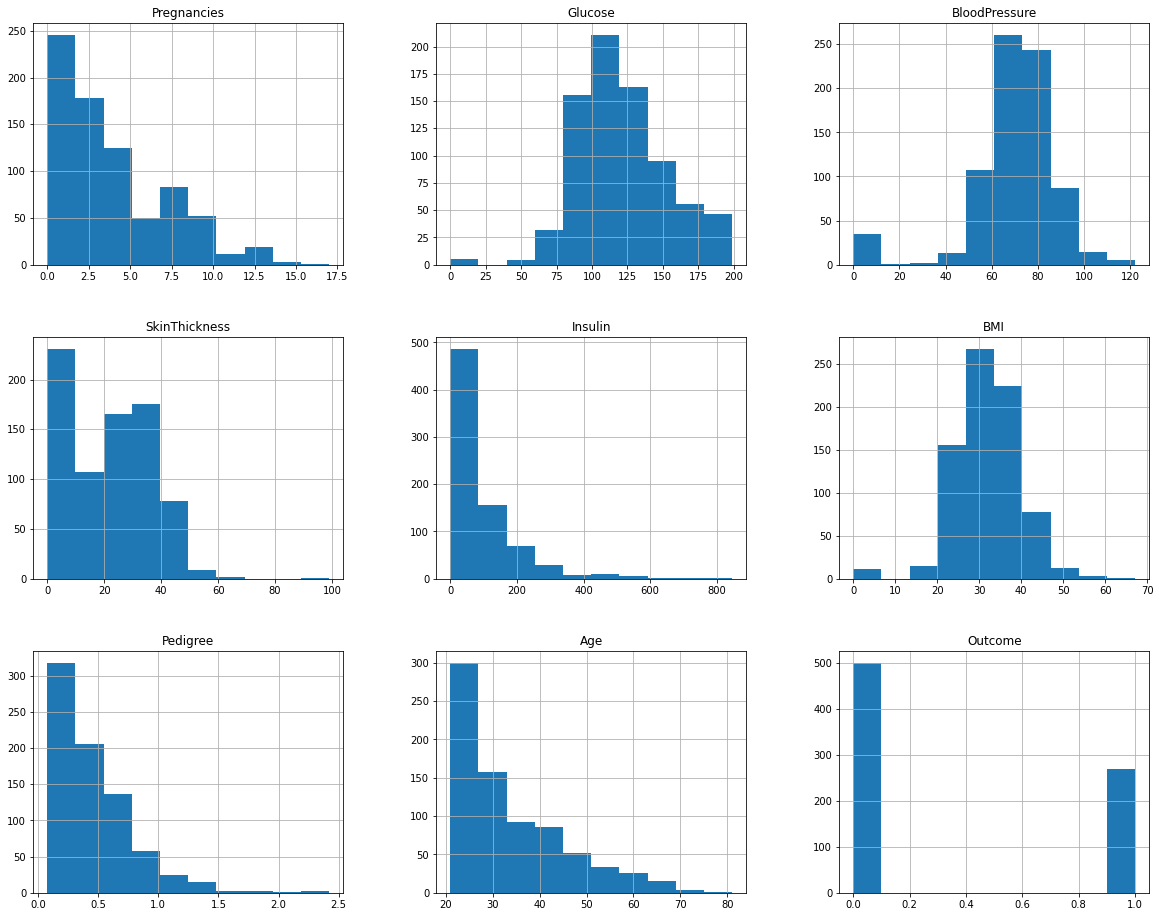

In [13]:
hist = df.hist(figsize=(20,16))

In [17]:
X=df.iloc[:, :df.shape[1]-1]       #Independent Variables
y=df.iloc[:, -1]                   #Dependent Variable
X.shape, y.shape

((768, 8), (768,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
def knn(X_train, X_test, y_train, y_test, neighbors = 37):
    model = KNeighborsClassifier(n_neighbors=neighbors)
    # Fit and predict on model
    # Model is trained using the train set and predictions are made based on the test set. Accuracy scores are calculated for the model.
    y_pred=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for K-Nearest Neighbors model \t: {accuracy_score(y_test, y_pred)}")

    cm = confusion_matrix(y_test, y_pred)
    print(f'''Confusion matrix :\n
    | Positive Prediction\t| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP) {cm[0, 0]}\t| False Positive (FN) {cm[0, 1]}
    ---------------+------------------------+----------------------
    Negative Class | False Nagative (FP) {cm[1, 0]}\t| True Negative (TN) {cm[1, 1]}\n''')
    cr = classification_report(y_test, y_pred)
    print('Classification report : \n', cr)

In [47]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_neighbors': range(1, 51),
    'p': range(1, 4)
}
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5,)
grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_params_, grid.best_score_ 


(KNeighborsClassifier(n_neighbors=37),
 {'n_neighbors': 37, 'p': 2},
 0.7605757696921231)

In [48]:
from sklearn import metrics

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=30),
}

for model_name, model in models.items():
    y_pred=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for {model_name} model \t: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy for K-Nearest Neighbors model 	: 0.7922077922077922


In [49]:
knn(X_train, X_test, y_train, y_test)

Accuracy for K-Nearest Neighbors model 	: 0.7857142857142857
Confusion matrix :

    | Positive Prediction	| Negative Prediction
    ---------------+------------------------+----------------------
    Positive Class | True Positive (TP) 93	| False Positive (FN) 9
    ---------------+------------------------+----------------------
    Negative Class | False Nagative (FP) 24	| True Negative (TN) 28

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       102
           1       0.76      0.54      0.63        52

    accuracy                           0.79       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.79      0.77       154

